### Exploratory Data Analysis of Zomato Restaurant Data

In [1]:
#Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import nltk

In [3]:
import sqlite3

### Load the Data

In [4]:
# SQL connection was created to given SQLite database
con = sqlite3.connect(r"E:\Data Analytics\Data Analytics\python_projects\zomato geospatial analysis/zomato_rawdata.sqlite")

In [5]:
df = pd.read_sql_query("SELECT * FROM Users", con)

### View the data and deal with missing values 

In [6]:
df.head(10)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,None,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


#### Explaining Datasets
1. url contains the url of the restaurant in the zomato website

2. address contains the address of the restaurant in Bengaluru

3. name contains the name of the restaurant

4. online_order whether online ordering is available in the restaurant or not

5. book_table table book option available or not

6. rate contains the overall rating of the restaurant out of 5

7. votes contains total number of rating for the restaurant as of the above mentioned date

8. phone contains the phone number of the restaurant

9. location contains the neighborhood in which the restaurant is located

10. rest_type restaurant type

11. dish_liked dishes people liked in the restaurant

12. cuisines food styles, separated by comma

13. approx_cost(for two people) contains the approximate cost for meal for two people

14. reviews_list list of tuples containing reviews for the restaurant, each tuple

15. menu_item contains list of menus available in the restaurant

16. listed_in(type) type of meal

17. listed_in(city) contains the neighborhood in which the restaurant is listed

In [7]:
df.shape


(51717, 18)

In [8]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [9]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
df.isnull().sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

'''
     -->> Around 50 % of data will be lost if I delete the nan values in dish_liked column so i kept that column for now.
        
let's check for rate column as it contains 15% of its points as null value which is one of the most important feature.
         
'''

In [11]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

##### so lets replace 'NEW' & '-' with np.nan or with "missing value" ,so that we can fill later it with some value.

In [12]:
df['rate'].replace(('NEW', '-'), np.nan, inplace=True)

In [13]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
df['rate'] = df['rate'].apply(lambda x: float(x.split('/')[0]) if type(x) == str else x)

In [15]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

### Data Analysis

#### Relation between online order option and rating of the restaurant

In [16]:
rate_table = pd.crosstab(df['rate'], df['online_order'])

In [17]:
rate_table

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<Axes: xlabel='rate'>

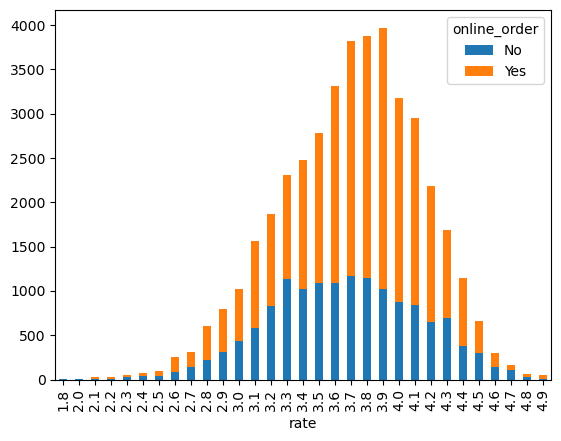

In [18]:
rate_table.plot(kind = 'bar', stacked= True)

In [19]:
rate_table.sum(axis=1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [20]:
norm_rate = rate_table.div(rate_table.sum(axis=1).astype(float), axis= 0)*100

In [21]:
norm_rate

online_order,No,Yes
rate,,
1.8,100.000000,0.000000
2.0,100.000000,0.000000
2.1,37.500000,62.500000
2.2,38.461538,61.538462
2.3,56.862745,43.137255
2.4,51.428571,48.571429
2.5,37.623762,62.376238
2.6,31.923077,68.076923
2.7,45.928339,54.071661


<Axes: xlabel='rate'>

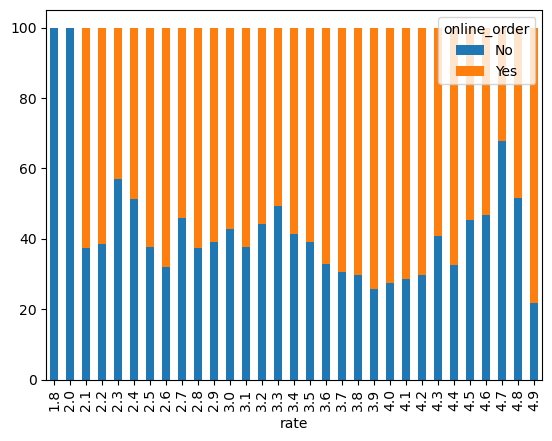

In [22]:
norm_rate.plot(kind = 'bar', stacked= True)

#### Insight:
For good rating ie > 4 , for most instances it seems that restaurant who accepts online order have received more number of ratings than those restaurant who don't accept online order. 

### Data Cleaning to perform Text Analysis
analysing customer reviews of Food Court restaurant : 

In [23]:
df['rest_type'].isnull().sum()

227

In [24]:
data = df.dropna(subset=['rest_type'])

In [25]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [26]:
### extracting data of 'Food Court' only
food_court_df = data[data['rest_type'].str.contains('Food Court')]

In [27]:
food_court_df.shape

(765, 18)

In [28]:
food_court_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [29]:
food_court_df['reviews_list']

886      [('Rated 3.0', "RATED\n  The waffles are a bit...
971      [('Rated 3.0', 'RATED\n  Visited this place wh...
1158     [('Rated 3.0', "RATED\n  The waffles are a bit...
1200     [('Rated 3.0', 'RATED\n  The shawarma had fren...
1207     [('Rated 1.0', "RATED\n  Not worth the price. ...
                               ...                        
51592    [('Rated 5.0', "RATED\n  It's a very nice plac...
51596    [('Rated 1.0', 'RATED\n  Honestly one of the w...
51603    [('Rated 3.0', 'RATED\n  A highly expensive pl...
51619    [('Rated 3.0', 'RATED\n  Have been here 3-4tim...
51620    [('Rated 4.0', 'RATED\n  This restaurant speci...
Name: reviews_list, Length: 765, dtype: object

In [30]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [31]:
### Converting all the text to lowercase
food_court_df['reviews_list'] = food_court_df['reviews_list'].apply(lambda x:x.lower())

In [32]:
### Perform tokenization

In [33]:
from nltk.corpus import RegexpTokenizer

In [34]:
tokenizer = RegexpTokenizer("[a-zA-Z]+")

In [35]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [36]:
tokenizer.tokenize(food_court_df['reviews_list'][971])


['rated',
 'rated',
 'n',
 'visited',
 'this',
 'place',
 'while',
 'in',
 'meenakshi',
 'price',
 'looked',
 'kinda',
 'reasonable',
 'it',
 's',
 'in',
 'the',
 'food',
 'court',
 'they',
 'have',
 'different',
 'kind',
 'of',
 'combos',
 'food',
 'will',
 'be',
 'served',
 'in',
 'to',
 'min',
 'usually',
 'which',
 'i',
 'felt',
 'a',
 'lil',
 'too',
 'much',
 'for',
 'a',
 'food',
 'court',
 'it',
 's',
 'alright',
 'rated',
 'rated',
 'n',
 'food',
 'was',
 'good',
 'but',
 'the',
 'order',
 'took',
 'too',
 'long',
 'to',
 'get',
 'delivered',
 'also',
 'there',
 'is',
 'some',
 'scope',
 'of',
 'improvement',
 'on',
 'the',
 'taste',
 'but',
 'taste',
 'was',
 'ok',
 'overall',
 'the',
 'feedback',
 'was',
 'ok',
 'rated',
 'rated',
 'n',
 'very',
 'swift',
 'response',
 'to',
 'customer',
 'grievieances',
 'and',
 'good',
 'quality',
 'food',
 'even',
 'received',
 'complementary',
 'gulab',
 'jamuns',
 'and',
 'love',
 'the',
 'way',
 'they',
 'treat',
 'their',
 'customers',

### Unigram analysis & removal of stopwords

In [37]:
### considered some sample as i don't have good specifications in my system !
sample = data[0:10000]

In [38]:
tokens_reviews = sample['reviews_list'].apply(tokenizer.tokenize)

In [39]:
tokens_reviews

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
10046    [Rated, RATED, n, A, simplistic, joy, for, loc...
10047                              [Rated, RATED, n, Good]
10048    [Rated, RATED, n, Vry, gud, taste, and, someth...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [40]:
from nltk.corpus import stopwords
no_use = stopwords.words('english')

In [41]:
###  These are common words defined by Python developers that typically don't add meaning to the text and can be removed
print(no_use)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [42]:
### Some more custom words added to stopwords
no_use.extend(["rated","n", "x", "Rated", "RATED"])

In [43]:
print(no_use)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [44]:
tokens_reviews

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
10046    [Rated, RATED, n, A, simplistic, joy, for, loc...
10047                              [Rated, RATED, n, Good]
10048    [Rated, RATED, n, Vry, gud, taste, and, someth...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [45]:
rev1 = tokens_reviews[1]

In [46]:
print(rev1)

['Rated', 'RATED', 'n', 'Had', 'been', 'here', 'for', 'dinner', 'with', 'family', 'Turned', 'out', 'to', 'be', 'a', 'good', 'choose', 'suitable', 'for', 'all', 'ages', 'of', 'people', 'Can', 'try', 'this', 'place', 'We', 'liked', 'the', 'most', 'was', 'their', 'starters', 'Service', 'is', 'good', 'Prices', 'are', 'affordable', 'Will', 'recommend', 'this', 'restaurant', 'for', 'early', 'dinner', 'The', 'place', 'is', 'little', 'noisy', 'Rated', 'RATED', 'n', 'The', 'ambience', 'is', 'really', 'nice', 'staff', 'is', 'courteous', 'The', 'price', 'is', 'pretty', 'high', 'for', 'the', 'quantity', 'but', 'overall', 'the', 'experience', 'was', 'fine', 'The', 'quality', 'of', 'food', 'is', 'nice', 'but', 'nothing', 'extraordinary', 'They', 'also', 'have', 'buffet', 'only', 'veg', 'Rated', 'RATED', 'n', 'I', 'felt', 'good', 'is', 'little', 'expensive', 'for', 'the', 'quantity', 'they', 'serve', 'and', 'In', 'terms', 'of', 'taste', 'is', 'decent', 'There', 'is', 'nothing', 'much', 'to', 'talk', 

In [47]:
### remove stopwords from second row
print([token for token in rev1 if token not in no_use])

['Had', 'dinner', 'family', 'Turned', 'good', 'choose', 'suitable', 'ages', 'people', 'Can', 'try', 'place', 'We', 'liked', 'starters', 'Service', 'good', 'Prices', 'affordable', 'Will', 'recommend', 'restaurant', 'early', 'dinner', 'The', 'place', 'little', 'noisy', 'The', 'ambience', 'really', 'nice', 'staff', 'courteous', 'The', 'price', 'pretty', 'high', 'quantity', 'overall', 'experience', 'fine', 'The', 'quality', 'food', 'nice', 'nothing', 'extraordinary', 'They', 'also', 'buffet', 'veg', 'I', 'felt', 'good', 'little', 'expensive', 'quantity', 'serve', 'In', 'terms', 'taste', 'decent', 'There', 'nothing', 'much', 'talk', 'ambience', 'regular', 'casual', 'dining', 'restaurant', 'take', 'family', 'dinner', 'lunch', 'If', 'improve', 'quantity', 'may', 'reduce', 'price', 'bit', 'may', 'improve', 'presentation', 'food', 'might', 'Manage', 'get', 'repeat', 'customers', 'I', 'looking', 'quite', 'place', 'spend', 'time', 'family', 'well', 'wanted', 'try', 'new', 'place', 'Since', 'I', '

In [48]:
### remove stopwords from "tokens_reviews" Series
tokens_reviews_clean = tokens_reviews.apply(lambda each_review: [token for token in each_review if token not in no_use])

In [49]:
tokens_reviews_clean

0        [A, beautiful, place, dine, The, interiors, ta...
1        [Had, dinner, family, Turned, good, choose, su...
2        [Ambience, good, enough, pocket, friendly, caf...
3        [Great, food, proper, Karnataka, style, full, ...
4        [Very, good, restaurant, neighbourhood, Buffet...
                               ...                        
10046    [A, simplistic, joy, local, biryani, lovers, n...
10047                                               [Good]
10048    [Vry, gud, taste, something, different, must, ...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [50]:
### Store entire data in the list so that i can compute frequency of each word
total_reviews_2D = list(tokens_reviews_clean)

##### list( tokens_reviews_clean ) gives us 2-D list (list inside list) , as each row is already a list & then we will convert this 2-D list into 1-D list

In [51]:
total_reviews_1D = []
for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)

In [52]:
total_reviews_1D

['A',
 'beautiful',
 'place',
 'dine',
 'The',
 'interiors',
 'take',
 'back',
 'Mughal',
 'era',
 'The',
 'lightings',
 'perfect',
 'We',
 'went',
 'occasion',
 'Christmas',
 'limited',
 'items',
 'available',
 'But',
 'taste',
 'service',
 'compromised',
 'The',
 'complaint',
 'breads',
 'could',
 'better',
 'Would',
 'surely',
 'like',
 'come',
 'I',
 'dinner',
 'family',
 'weekday',
 'The',
 'restaurant',
 'completely',
 'empty',
 'Ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'Seating',
 'arrangement',
 'good',
 'We',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'Food',
 'fresh',
 'good',
 'service',
 'good',
 'Good',
 'family',
 'hangout',
 'nCheers',
 'Its',
 'restaurant',
 'near',
 'Banashankari',
 'BDA',
 'Me',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'On',
 'inquiring',
 'said',
 'pla

### Unigram Analysis

In [53]:
from nltk import FreqDist

In [54]:
fd = FreqDist()

In [55]:
for word in total_reviews_1D:
    fd[word] += 1

In [56]:
# Examining the top 20 most frequent words
fd.most_common(20)

[('place', 139173),
 ('I', 137965),
 ('good', 134232),
 ('food', 126195),
 ('The', 97479),
 ('chicken', 46887),
 ('service', 41216),
 ('taste', 40063),
 ('ordered', 39651),
 ('great', 34402),
 ('really', 33942),
 ('time', 33052),
 ('try', 32415),
 ('one', 32079),
 ('ambience', 31703),
 ('like', 30679),
 ('also', 30647),
 ('It', 30487),
 ('visit', 27355),
 ('restaurant', 26421)]

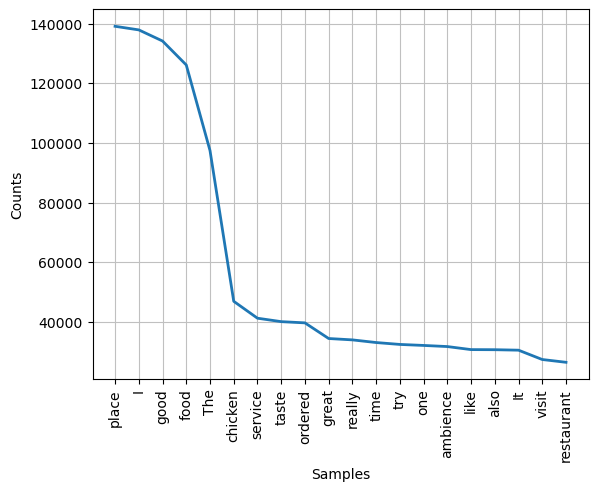

<Axes: xlabel='Samples', ylabel='Counts'>

In [57]:
fd.plot(20)

#### Observation: 
20 most frequent words across customer reviews are- place, food , good , chicken ,taste ,service ,time

But it is not that much clear whether food is good or not , 
similarly what about chicken ??
so to come up with meaningful insights , we can think of using Bi-gram analysis.

### Bi-gram & Trigram analysis

In [58]:
from nltk import FreqDist, bigrams, trigrams

In [59]:
bigrams_ = bigrams(total_reviews_1D )

In [60]:
fd_bigrams = FreqDist()
for bigram in bigrams_:
    fd_bigrams[bigram] = fd_bigrams[bigram]+1

In [61]:
fd_bigrams.most_common(100)

[(('The', 'food'), 10497),
 (('I', 'ordered'), 10159),
 (('really', 'good'), 9575),
 (('This', 'place'), 8208),
 (('must', 'try'), 7824),
 (('I', 'would'), 7353),
 (('We', 'ordered'), 7223),
 (('visit', 'place'), 6897),
 (('food', 'good'), 6823),
 (('good', 'food'), 6482),
 (('The', 'place'), 6158),
 (('main', 'course'), 5544),
 (('non', 'veg'), 5364),
 (('good', 'place'), 5339),
 (('ice', 'cream'), 5287),
 (('also', 'good'), 5083),
 (('The', 'ambience'), 4798),
 (('I', 'tried'), 4523),
 (('good', 'I'), 4139),
 (('good', 'The'), 4078),
 (('food', 'I'), 3998),
 (('place', 'I'), 3896),
 (('The', 'service'), 3830),
 (('one', 'best'), 3711),
 (('must', 'visit'), 3658),
 (('I', 'love'), 3529),
 (('quality', 'food'), 3510),
 (('nWe', 'ordered'), 3490),
 (('time', 'I'), 3398),
 (('nice', 'place'), 3290),
 (('The', 'staff'), 3286),
 (('taste', 'good'), 3275),
 (('pretty', 'good'), 3270),
 (('fried', 'rice'), 3127),
 (('pocket', 'friendly'), 3097),
 (('place', 'good'), 3083),
 (('I', 'loved'), 

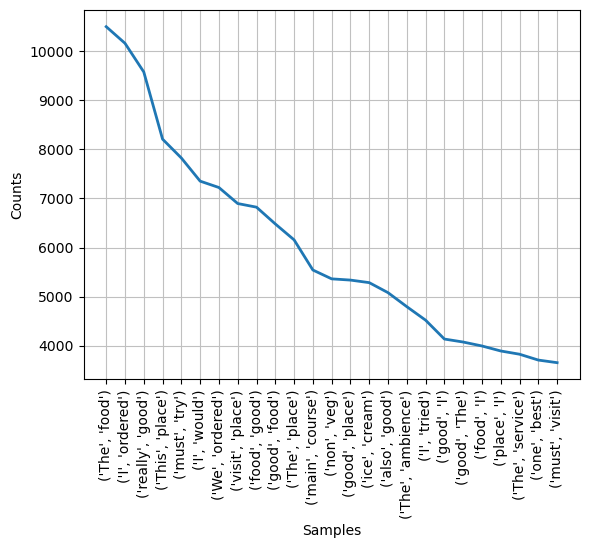

<Axes: xlabel='Samples', ylabel='Counts'>

In [62]:
fd_bigrams.plot(25)

#### Observations:
We have some new insights! Food items/preferences mentioned in the top  100 bigrams are -
Fried Rice , Ice cream , non-veg , chicken biryani , main course, must visit, value money, good ambience. 

Factors contributing to restaurant experience are : 
good food > pocket friendly > good place > good place > must visit > value (for) money > Home delivery.

There's a key insight here: the expense factor, which was missed by individual word frequency counts, was picked up by the bigram frequency counts.

In [63]:
### But there is no conclusion about north Indian or south Indian bcz it can be dish or it can be regional people as well..
### so lets perform trigram anlysis to come up with some more meaningful insights.

#### Trigram Analysis

In [64]:
trigrams_ = trigrams(total_reviews_1D)

In [65]:
fd_trigrams = FreqDist()
for trigram in trigrams_:
    fd_trigrams[trigram] = fd_trigrams[trigram]+1

In [66]:
fd_trigrams.most_common(100)

[(('veg', 'non', 'veg'), 1525),
 (('must', 'visit', 'place'), 1487),
 (('The', 'food', 'good'), 1339),
 (('place', 'hangout', 'friends'), 1165),
 (('I', 'must', 'say'), 1131),
 (('I', 'would', 'recommend'), 1059),
 (('I', 'visited', 'place'), 1054),
 (('I', 'would', 'say'), 979),
 (('place', 'hang', 'friends'), 967),
 (('food', 'really', 'good'), 886),
 (('nFood', 'nAmbience', 'nService'), 845),
 (('A', 'must', 'visit'), 768),
 (('The', 'ambience', 'good'), 751),
 (('A', 'good', 'place'), 737),
 (('North', 'Indian', 'food'), 675),
 (('I', 'would', 'like'), 619),
 (('nFood', 'nService', 'nAmbience'), 607),
 (('A', 'must', 'try'), 603),
 (('I', 'really', 'liked'), 595),
 (('I', 'ordered', 'chicken'), 582),
 (('first', 'time', 'I'), 570),
 (('The', 'staff', 'friendly'), 561),
 (('The', 'best', 'part'), 561),
 (('The', 'food', 'really'), 559),
 (('Overall', 'good', 'experience'), 558),
 (('I', 'love', 'place'), 554),
 (('paneer', 'butter', 'masala'), 554),
 (('really', 'good', 'The'), 552)

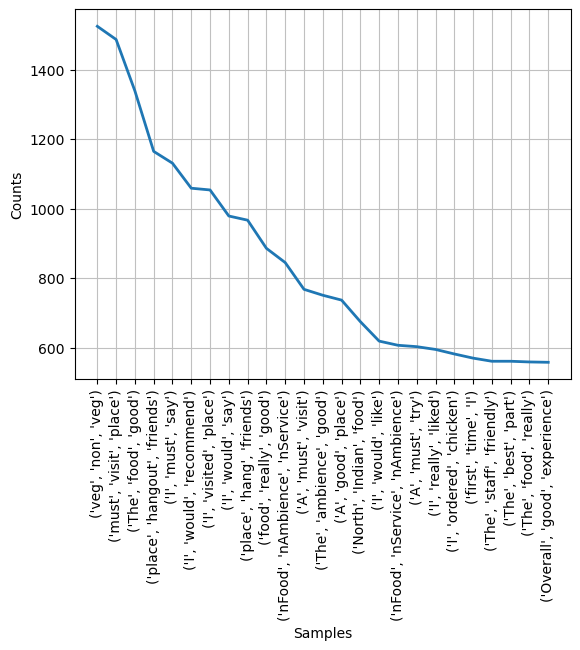

<Axes: xlabel='Samples', ylabel='Counts'>

In [67]:
fd_trigrams.plot(25)

#### Observations:
The specific food preferences we can see here are north Indian Food , paneer butter masala, vanilla ice cream, South Indian food, chicken fried rice & thin crust pizza.

In [68]:
### Similarly we can use cuisines features for Text Analysis as well.

### Spatial Analysis
Problem statement : where are most of the North-Indian restaurants situated in Bengaluru ? 

In [109]:
import geocoder

In [70]:
import geopy

In [110]:
df['location']

0                Banashankari, Bangalore, Karnataka, India
1                Banashankari, Bangalore, Karnataka, India
2                Banashankari, Bangalore, Karnataka, India
3                Banashankari, Bangalore, Karnataka, India
4                Basavanagudi, Bangalore, Karnataka, India
                               ...                        
51712              Whitefield, Bangalore, Karnataka, India
51713              Whitefield, Bangalore, Karnataka, India
51714              Whitefield, Bangalore, Karnataka, India
51715    ITPL Main Road, Whitefield, Bangalore, Karnata...
51716    ITPL Main Road, Whitefield, Bangalore, Karnata...
Name: location, Length: 51672, dtype: object

In [72]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [73]:
 df['location'] = df['location'] + ", Bangalore, Karnataka, India"

In [74]:
df['location']

0                Banashankari, Bangalore, Karnataka, India
1                Banashankari, Bangalore, Karnataka, India
2                Banashankari, Bangalore, Karnataka, India
3                Banashankari, Bangalore, Karnataka, India
4                Basavanagudi, Bangalore, Karnataka, India
                               ...                        
51712              Whitefield, Bangalore, Karnataka, India
51713              Whitefield, Bangalore, Karnataka, India
51714              Whitefield, Bangalore, Karnataka, India
51715    ITPL Main Road, Whitefield, Bangalore, Karnata...
51716    ITPL Main Road, Whitefield, Bangalore, Karnata...
Name: location, Length: 51717, dtype: object

In [75]:
df_copied = df.copy()

In [76]:
df_copied['location'].isnull().sum()

21

In [77]:
df_copied = df_copied.dropna(subset=['location'])

In [78]:
df_copied['location'].isnull().sum()

0

In [79]:
locations = pd.DataFrame(df_copied['location'].unique())

In [80]:
locations.columns = ['location_name']

In [81]:
locations

,location_name
0,"Banashankari, Bangalore, Karnataka, India"
1,"Basavanagudi, Bangalore, Karnataka, India"
2,"Mysore Road, Bangalore, Karnataka, India"
3,"Jayanagar, Bangalore, Karnataka, India"
4,"Kumaraswamy Layout, Bangalore, Karnataka, India"
...,...
88,"West Bangalore, Bangalore, Karnataka, India"
89,"Magadi Road, Bangalore, Karnataka, India"
90,"Yelahanka, Bangalore, Karnataka, India"
91,"Sahakara Nagar, Bangalore, Karnataka, India"


#### Extract geographical-coordinates from data
we need latitudes & longitudes to get coordinates of res. locations.

In [82]:
from geopy.geocoders import Nominatim

In [83]:
geo_locator = Nominatim(user_agent="app", timeout= None)

In [84]:
latitude_ = []
longitude_ = []
for location in locations['location_name']:
    location = geo_locator.geocode(location)
    if location is None:
        latitude_.append(np.nan)
        longitude_.append(np.nan)
    else:
        latitude_.append(location.latitude)
        longitude_.append(location.longitude)

In [85]:
locations['latitude'] = latitude_
locations['longitude'] = longitude_

In [111]:
locations

,location_name,latitude,longitude
0,"Banashankari, Bangalore, Karnataka, India",12.915219,77.573621
1,"Basavanagudi, Bangalore, Karnataka, India",12.941726,77.575502
2,"Mysore Road, Bangalore, Karnataka, India",12.946662,77.530090
3,"Jayanagar, Bangalore, Karnataka, India",12.929273,77.582423
4,"Kumaraswamy Layout, Bangalore, Karnataka, India",12.908149,77.555318
...,...,...,...
88,"West Bangalore, Bangalore, Karnataka, India",13.022235,77.567183
89,"Magadi Road, Bangalore, Karnataka, India",12.975608,77.555356
90,"Yelahanka, Bangalore, Karnataka, India",13.100698,77.596345
91,"Sahakara Nagar, Bangalore, Karnataka, India",13.062147,77.580061


In [87]:
### we have got the coordinates of N. Indian res. locations..lets figure it out whether we have misssing values or not !

In [88]:
locations.isnull().sum()

location_name    0
latitude         2
longitude        2
dtype: int64

In [89]:
locations[locations['latitude'].isna()]

,location_name,latitude,longitude
79,"Rammurthy Nagar, Bangalore, Karnataka, India",NaN,NaN
85,"Sadashiv Nagar, Bangalore, Karnataka, India",NaN,NaN


In [90]:
### Took help of google to find coordinates of these 2 places.
locations['latitude'][79] = 13.0184435
locations['longitude'][79] = 77.67812149999997
locations['latitude'][85] = 13.010316
locations['longitude'][85] = 77.580569

In [91]:
locations.isnull().sum()

location_name    0
latitude         0
longitude        0
dtype: int64

In [92]:
df['cuisines'].isnull().sum()

45

In [93]:
df = df.dropna(subset=['cuisines'])

In [94]:
### lets find it out what are those areas where we have most number of North-Indian restaurants ?
## ie lets extract dataframe of only 'North Indian' cuisine restaurant.
north_indian = df[df['cuisines'].str.contains('North Indian')]

In [95]:
north_indian.shape

(21085, 18)

In [96]:
north_indian_rest_count = north_indian['location'].value_counts().reset_index().rename(columns={'index':'name', "location":"location_name"})

In [97]:
north_indian_rest_count

,location_name,count
0,"BTM, Bangalore, Karnataka, India",2469
1,"HSR, Bangalore, Karnataka, India",1123
2,"Whitefield, Bangalore, Karnataka, India",1059
3,"Marathahalli, Bangalore, Karnataka, India",1038
4,"JP Nagar, Bangalore, Karnataka, India",958
...,...,...
85,"Hebbal, Bangalore, Karnataka, India",4
86,"Jakkur, Bangalore, Karnataka, India",3
87,"Central Bangalore, Bangalore, Karnataka, India",2
88,"West Bangalore, Bangalore, Karnataka, India",1


In [98]:
### lets create Heatmap of this results so that it becomes more user-friendly.
## now In order to perform Spatial Anlysis(Geographical Analysis) , we need latitudes & longitudes of every location..

### so lets merge both the dataframes or append one into another in order to get geographical co-ordinates.

In [99]:
coordinate_table = north_indian_rest_count.merge(locations,on='location_name', how='left')

In [112]:
coordinate_table

,location_name,count,latitude,longitude
0,"BTM, Bangalore, Karnataka, India",2469,12.911276,77.604565
1,"HSR, Bangalore, Karnataka, India",1123,12.911623,77.638862
2,"Whitefield, Bangalore, Karnataka, India",1059,12.969637,77.749745
3,"Marathahalli, Bangalore, Karnataka, India",1038,12.955257,77.698416
4,"JP Nagar, Bangalore, Karnataka, India",958,12.912076,77.579393
...,...,...,...,...
85,"Hebbal, Bangalore, Karnataka, India",4,13.038218,77.591900
86,"Jakkur, Bangalore, Karnataka, India",3,13.078474,77.606894
87,"Central Bangalore, Bangalore, Karnataka, India",2,12.973037,77.538238
88,"West Bangalore, Bangalore, Karnataka, India",1,13.022235,77.567183


In [101]:
basemap = folium.Map()

In [102]:
from folium.plugins import HeatMap

In [103]:
HeatMap(coordinate_table[["latitude", "longitude", "count"]]).add_to(basemap)

In [113]:
basemap

### conclusions(Inferences)
    1 It is clear that restaurants tend to concentrate in central bangalore  area.
    2 The clutter of restaurants lowers as we move away from central.
    3 So, potential restaurant entrepreneurs can refer this and find out good locations for their venture.
    Note:- heatmap is good when we have latitude,longitude or importance of  that  particular place or count of that place.

#### let's design a function which can automate this task for any cuisine

In [105]:
def location_heatmap(cuisine):
    cuisine_df = df[df['cuisines'].str.contains(cuisine)]
    cuisine_rest_count = cuisine_df['location'].value_counts().reset_index().rename(columns={'index':'name', "location":"location_name"})
    coordinate_table = cuisine_rest_count.merge(locations , on='location_name' , how='left')
    print(coordinate_table.head(10))
    basemap = folium.Map()
    HeatMap(coordinate_table[['latitude', 'longitude' , "count"]]).add_to(basemap)
    return basemap

In [106]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [107]:
### used above function to create heatmap for 'Thai' rest.

In [108]:
location_heatmap('Thai')

                                       location_name  count   latitude  \
0  Koramangala 5th Block, Bangalore, Karnataka, I...    125  12.934843   
1               MG Road, Bangalore, Karnataka, India     71  12.975526   
2           Indiranagar, Bangalore, Karnataka, India     62  12.973291   
3       Cunningham Road, Bangalore, Karnataka, India     55  12.987043   
4              JP Nagar, Bangalore, Karnataka, India     49  12.912076   
5             Jayanagar, Bangalore, Karnataka, India     43  12.929273   
6                   HSR, Bangalore, Karnataka, India     38  12.911623   
7                Ulsoor, Bangalore, Karnataka, India     34  12.977879   
8         Infantry Road, Bangalore, Karnataka, India     32  12.980264   
9          Kalyan Nagar, Bangalore, Karnataka, India     28  13.022142   

   longitude  
0  77.618977  
1  77.606790  
2  77.640467  
3  77.594924  
4  77.579393  
5  77.582423  
6  77.638862  
7  77.624670  
8  77.604264  
9  77.640337  


### conclusions
Certainly! Here's a comprehensive conclusion that ties together all the insights and findings from my project:

The analysis of the Zomato restaurant data has provided valuable insights into various aspects of the restaurant industry in Bangalore. By combining data analysis, visualization, and geographical analysis, I have gained a deeper understanding of restaurant preferences, customer reviews, and geographical patterns. Here are the key conclusions drawn from this project:

1. **Data Quality and Cleaning:**
   - Initial data inspection revealed missing values in important columns such as `dish_liked` and `rate`. Treating missing values is crucial, and in this project, I demonstrated a strategy to handle them without losing significant information.
   - The `rate` column was carefully processed, transforming it into a more usable format for analysis.

2. **Online Ordering and Ratings:**
   - A cross-tabulation and visualization of ratings against online ordering availability showed that highly-rated restaurants often offer online ordering services. This insight can guide restaurant owners in enhancing customer satisfaction and attracting higher ratings by providing online ordering options.

3. **Customer Review Analysis:**
   - Text analysis of customer reviews from the `reviews_list` column revealed common keywords and phrases used by customers when discussing their experiences. This analysis can help restaurants identify strengths and areas for improvement.
   - Unigram, bigram, and trigram analyses provided increasingly detailed context from the reviews, enabling a more nuanced understanding of customer sentiments and preferences.

4. **Geographical Analysis:**
   - By extracting geographical coordinates from restaurant addresses and visualizing them on a heatmap, I identified areas with high concentrations of different types of restaurants.
   - The heatmap revealed hotspots of North Indian cuisine restaurants, suggesting potential business opportunities in these areas for entrepreneurs interested in opening similar establishments.

5. **Automation and Future Scope:**
   - The project highlighted the value of automation in data analysis tasks, such as generating heatmaps for different cuisines. This approach can be extended to other analyses, making the process more efficient and scalable.

In conclusion, this exploratory data analysis of Zomato restaurant data has provided actionable insights for restaurant owners, entrepreneurs, and industry analysts. It demonstrates the power of data-driven decision-making in the restaurant industry, enabling better understanding of customer preferences, competitive landscape, and potential business opportunities. By combining various analytical techniques, this project serves as a foundation for more advanced analyses and informed business strategies.